**câu 1**

In [10]:
import pandas as pd
from google.colab import files
import pandas as pd
import io

print('Nguyễn Viết Ái Nhi - 6351071054')
data = pd.read_csv('/content/Mall_Customers.csv')

# Hiển thị 5 dòng đầu tiên
print("5 dòng đầu tiên của dữ liệu:")
print(data.head())
# Thông tin tổng quan về dữ liệu
print("\nThông tin dữ liệu:")
print(data.info())

# Thống kê các thông số cơ bản cho cột số (Age, Annual Income, Spending Score)
print("\nThống kê mô tả các thuộc tính số:")
print(data.describe())

# Thống kê phân phối giá trị của cột Gender
print("\nPhân bố giới tính:")
print(data['Gender'].value_counts())
# Kiểm tra số giá trị thiếu cho từng cột
print("\nSố lượng giá trị thiếu trong từng cột:")
print(data.isnull().sum())

# Nếu có dữ liệu bị thiếu, có thể xử lý bằng cách:
# - Xóa các dòng chứa giá trị thiếu:
data_cleaned = data.dropna()

# Hoặc có thể điền giá trị trung bình/median cho các cột số:
# data['Age'] = data['Age'].fillna(data['Age'].mean())
# data['Annual Income'] = data['Annual Income'].fillna(data['Annual Income'].mean())
# data['Spending Score'] = data['Spending Score'].fillna(data['Spending Score'].mean())

# Kiểm tra lại sau khi xử lý
print("\nDữ liệu sau khi xử lý giá trị thiếu:")
print(data_cleaned.info())


Nguyễn Viết Ái Nhi - 6351071054
5 dòng đầu tiên của dữ liệu:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(

**câu 2**

Nguyễn Viết Ái Nhi - 6351071054


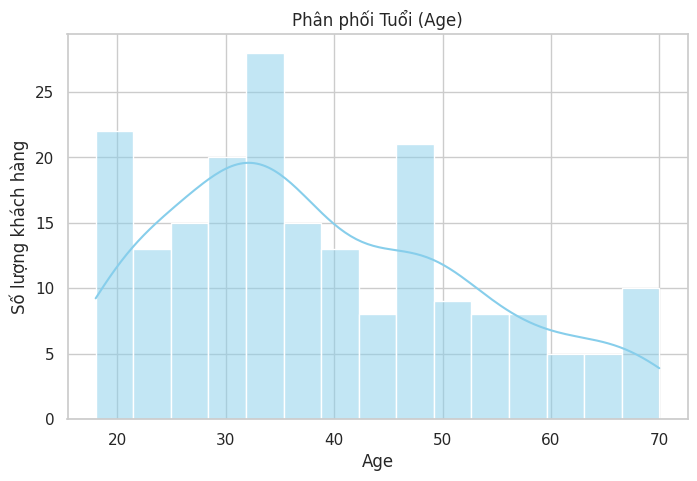

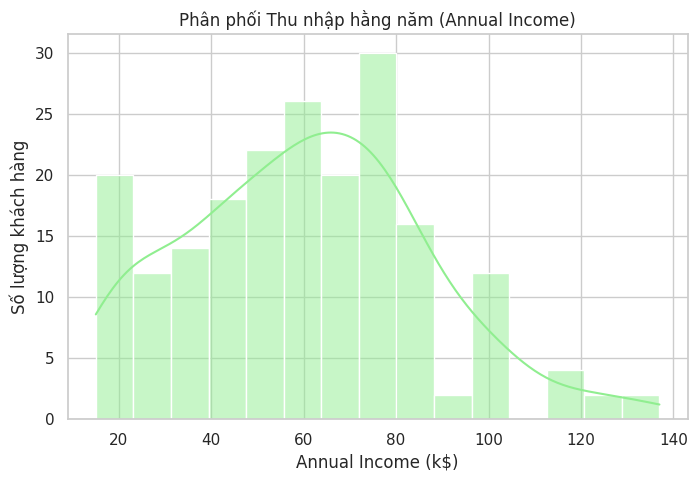

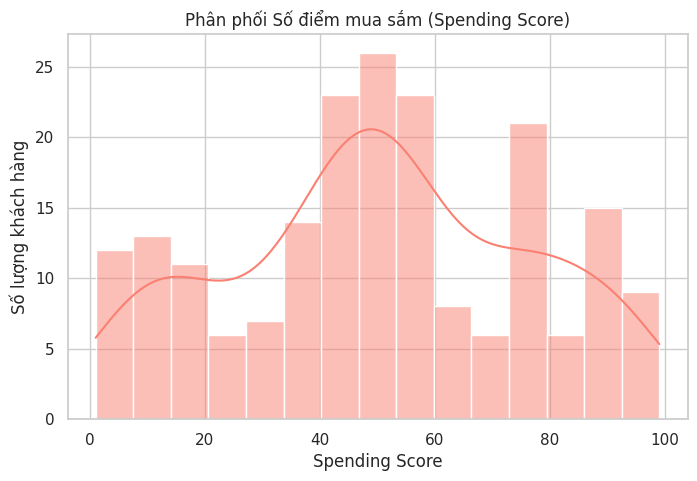

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

print('Nguyễn Viết Ái Nhi - 6351071054')
# Giả sử dataframe đã đọc là `data`

# Thiết lập style cho biểu đồ
sns.set(style="whitegrid")

# 1. Histogram cho Tuổi (Age)
plt.figure(figsize=(8,5))
sns.histplot(data['Age'], bins=15, kde=True, color='skyblue')
plt.title('Phân phối Tuổi (Age)')
plt.xlabel('Age')
plt.ylabel('Số lượng khách hàng')
plt.show()

# 2. Histogram cho Thu nhập hằng năm (Annual Income)
plt.figure(figsize=(8,5))
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, color='lightgreen')
plt.title('Phân phối Thu nhập hằng năm (Annual Income)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Số lượng khách hàng')
plt.show()

# 3. Histogram cho Số điểm mua sắm (Spending Score)
plt.figure(figsize=(8,5))
sns.histplot(data['Spending Score (1-100)'], bins=15, kde=True, color='salmon')
plt.title('Phân phối Số điểm mua sắm (Spending Score)')
plt.xlabel('Spending Score')
plt.ylabel('Số lượng khách hàng')
plt.show()


### Training a Simple ML Model: K-Means Clustering

We will use K-Means clustering to segment customers based on two key features: 'Annual Income (k$)' and 'Spending Score (1-100)'. This is a common unsupervised learning task used for customer segmentation.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
X = data_cleaned[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features (important for distance-based algorithms like KMeans)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("First 5 rows of scaled features:")
print(X_scaled[:5])

#### Elbow Method to Determine Optimal Number of Clusters (K)

To find the optimal number of clusters (K), we'll use the elbow method. This involves calculating the Within-Cluster Sum of Squares (WCSS) for different values of K and looking for the 'elbow' point where the decrease in WCSS starts to slow down.

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to find Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

From the elbow plot, we can observe that the 'elbow' appears to be around K=5. So, we will choose 5 as our optimal number of clusters.

In [ ]:
# Apply K-Means with the optimal number of clusters (e.g., 5 from the elbow method)
k = 5 # Chosen from the elbow method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels back to the original DataFrame
data_cleaned['Cluster'] = clusters

# Display the first few rows with the new 'Cluster' column
print("First 5 rows of data with cluster assignments:")
print(data_cleaned.head())

#### Visualize the Clusters

Now, let's visualize the clusters to see how the customers are segmented based on their annual income and spending score.

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=data_cleaned,
    palette='viridis',
    s=100, # size of the points
    alpha=0.8
)
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

This visualization clearly shows 5 distinct customer segments based on their income and spending habits.